In [29]:
#Data import lines to memorize
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Plot import lines to memorize
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#Scikit machine learning lines to memorize
from sklearn import linear_model
#Built in dataset we are using for practice
from sklearn.datasets import load_iris

In [31]:
#In order to use the dataset, we need to load an instance of it into a variable

iris = load_iris()

In [32]:
#To get the features, we use the .data method
X = iris.data
#To get the targets, we use the .target method
Y = iris.target
#easy and intuitive

In [33]:
print(iris.DESCR)
#.DESCR gives us a nice snapshot of the data -- see below

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
# To put the data into dataframes we make iris_data  = to DataFrame (feature source, column names pulled from DESCR)

iris_data = DataFrame(X,columns=['Sepal Length', 'Sepal Width', 'Petal Length','Petal Width'])

In [35]:
#Then we make our target dataframe in the same way
iris_target = DataFrame(Y,columns=['Species'])

In [36]:
#Because the target 'Species' is in a sort of dummy variable of 0,1, and 2 representing the three species names,
#We must figure out an efficient way to change the categorical numbers into the names they represent


In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
#This function will take 0,1, or 2 and change it to an appropriate name shown below.
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Verginica'

In [39]:
#We apply this by taking our target column and assigning it to itself with .apply(function) method
iris_target['Species'] = iris_target['Species'].apply(flower)

In [40]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [41]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [42]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


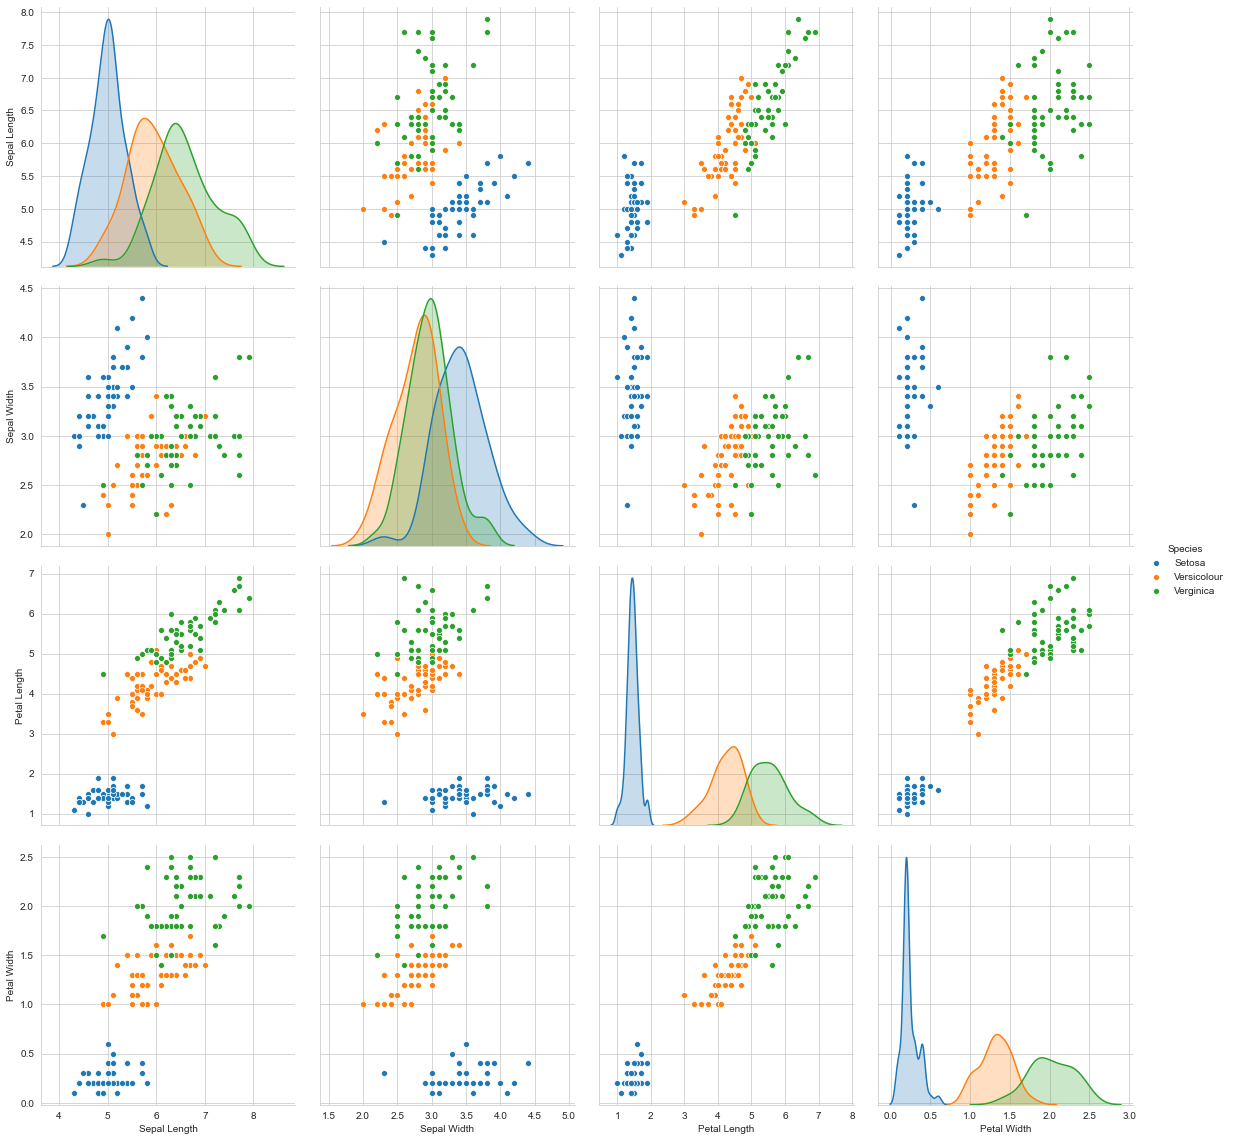

In [43]:
sns.pairplot(iris,hue='Species', height=4)
#Had to change size parameter to height per warning message
#I love python in jupyter notebooks!!!

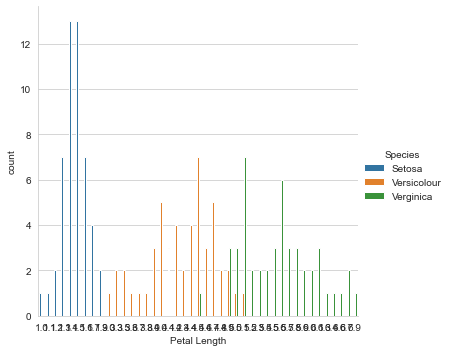

In [44]:
#Remember that factorplot is now catplot and you must make kind='count' to make hue functional
sns.catplot('Petal Length', data=iris, hue='Species',kind='count',height=5)

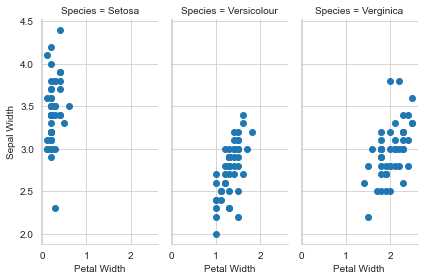

In [45]:
graph = sns.FacetGrid(iris,col='Species', height=4,aspect=.5)
graph.map(plt.scatter,'Petal Width', 'Sepal Width')

In [46]:
from sklearn.linear_model import LogisticRegression
#Instead of sklearn.cross_validation import train_test_split, don't forget to replace with sklearn.model_selection
from sklearn.model_selection import train_test_split

In [47]:
logreg = LogisticRegression(max_iter=1000)
#Be aware that changing the test_size parameter can alter the resultant model accuracy.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=3)
#To get rid of the warning that pops up on the .fit in the next step, it is necessary to increase our max_iter value from the 
#default 100 to a higher number.  If the estimate goes over the 100 value for the max_iter value, it won't reach a 
#convergence point and means our results are questionable.

In [48]:
logreg.fit(X_train, Y_train)
#We fit our line to our training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
from sklearn import metrics
#We import metrics to see how accurate our model is

In [50]:
Y_pred = logreg.predict(X_test)
#We create an object (variable) to hold our model's prediction of the X_test data

In [51]:
#We use metrics.accuracy_score to compare the Y_test data to the Y_pred data for a score in percent.
print (metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


In [52]:
#Given that our early visualizations showed fairly clear delineation between the species, it's no wonder we hit 96%


In [53]:
from sklearn.neighbors import KNeighborsClassifier


In [55]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [56]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [57]:
Y_pred = knn.predict(X_test)

In [58]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [59]:
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [61]:
Y_pred = knn.predict(X_test)


In [62]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [64]:
#Here is a way to rifle through all of the K values to find the one
# that gives us the best accuracy.  Large data sets will not allow for this.

k_range = range(1,21)

accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

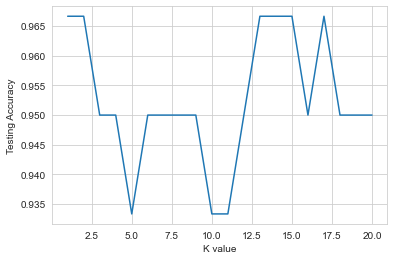

In [65]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')

In [66]:
#The above graph shows that using 1 and 13 would give us the best accuracy.